**Maniya Yash Rajeshbhai (B20CS033)**

# **Cryptography HW2**
## **Question 2**


### Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn


### Q2 (a)

Question 2 (a) - DDT : 

   0  1  2  3  4  5  6  7
0  8  0  0  0  0  0  0  0
1  0  4  0  4  0  0  0  0
2  0  0  0  0  2  2  2  2
3  0  0  0  0  2  2  2  2
4  0  0  0  0  2  2  2  2
5  0  0  0  0  2  2  2  2
6  0  4  4  0  0  0  0  0
7  0  0  4  4  0  0  0  0


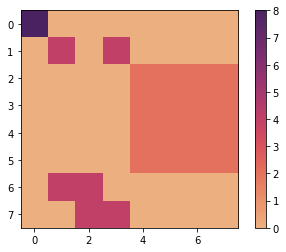

In [30]:
plain_text = '011010'
keys = ['010101', '001011', '111000', '111110']
sbox = {}

def do_xor(a, b):
    res = ''
    for i in range(len(a)):
        if a[i]==b[i]:
            res+='0'
        else:
            res+='1'
    return res

def get_bin(x, n):
    res = bin(x)[2:]
    while len(res)<n:
        res = '0'+res
    return res

def create_sbox():
    sbox["000"] = "110"
    sbox["001"] = "101"
    sbox["010"] = "001"
    sbox["011"] = "000"
    sbox["100"] = "011"
    sbox["101"] = "010"
    sbox["110"] = "111"
    sbox["111"] = "100"

def find_DDT(sbox):
    DDT = [[0 for i in range(8)] for j in range(8)]
    for i in range(8):
        for j in range(8):
            delx = i^j
            y1 = sbox[get_bin(i, 3)]
            y2 = sbox[get_bin(j, 3)]

            res = do_xor(y1, y2)
            dely = int(res, 2)
            DDT[delx][dely]+=1
    return DDT

def print_DDT(DDT):
    print("Question 2 (a) - DDT : \n")
    ddt_df = pd.DataFrame(np.array(DDT))
    print(ddt_df)
    plt.imshow(DDT, cmap='flare', interpolation='nearest')
    plt.colorbar()
    plt.show()

create_sbox()
print_DDT(find_DDT(sbox))


### Q2 (b)

In [67]:
def encrypt(plain_text, key, sbox):
    print('Question 2 (b) :\n')
    round = 1
    row = 'A'
    for i in range(4):
        plain_text = do_xor(plain_text, key[i])
        print(f'Round {round} : Row {row} : {plain_text}')
        round+=1
        row = chr(ord('A')+round-1)
        if row=='I':
            row='J'

        first = sbox[plain_text[:3]]
        second = sbox[plain_text[3:]]
        curr = first + second
        if round==10:
            print(f'\nEncryption of the Plaintext is : {plain_text}')
            break
        else:
            plain_text = curr
            print(f'Round {round} : Row {row} : {plain_text}')
        round+=1
        row = chr(ord('A')+round-1)
        if row=='I':
            row='J'

        if i<2:
            temp = ''
            for j in range(3):
                temp+=first[j]
                temp+=second[j]
            plain_text = temp
            print(f'Round {round} : Row {row} : {plain_text}')
            round+=1
            row = chr(ord('A')+round-1)
            if row=='I':
                row='J'
    return plain_text

cipher_text = encrypt(plain_text, keys, sbox)


Question 2 (b) :

Round 1 : Row A : 001111
Round 2 : Row B : 101100
Round 3 : Row C : 110010
Round 4 : Row D : 111001
Round 5 : Row E : 100101
Round 6 : Row F : 110001
Round 7 : Row G : 001001
Round 8 : Row H : 101101
Round 9 : Row J : 010011

Encryption of the Plaintext is : 010011


### Q2 (c)

In [82]:
def solve(plain_text, key, sbox):
    for i in range(4):
        plain_text = do_xor(plain_text, key[i])
        first = sbox[plain_text[:3]]
        second = sbox[plain_text[3:]]
        curr = first + second

        if i<2:
            temp = ''
            for j in range(3):
                temp+=first[j]
                temp+=second[j]
            plain_text = temp
            
    return plain_text

def gimme_delta_H():
    counts = {}
    for i in range(64):
        for j in range(64):
            val = i^j
            if val==1:
                c1 = solve(get_bin(i, 6), keys, sbox)
                c2 = solve(get_bin(j, 6), keys, sbox)
                res = do_xor(c1, c2)
                # print(i, j, c1, c2, res)
                if res not in counts:
                    counts[res] = 1
                else:
                    counts[res] += 1
    print('\nQuestion 2 (c) - Possible δH values :\n')
    print('Value  : Frequency\n')
    for elem in counts:
        print(f'{elem} : {counts[elem]}')

gimme_delta_H()


Question 2 (c) - Possible δH values :

Value  : Frequency

000001 : 16
010100 : 8
010000 : 8
000101 : 16
010101 : 8
010001 : 8


### Q2 (d)

In [87]:
def find_k4_last3():
    target = '011'
    count = {}
    ciphers = ["110110", "110010", "001101", "000011", "111001", "100000", "011101", "011111", "101001", "101000", "111110", "100100"]
    for i in range(8):
        for j in range(len(ciphers)):
            k = solve(get_bin(i, 6), keys, sbox)
            c = solve(get_bin(j, 6), keys, sbox)
            res = do_xor(k, c)
            comp = sbox[res[3:]]
            if comp == target:
                if k not in count:
                    count[k]=0
                count[k]+=1

    store = ''
    num = 0
    for elem in count:
        if count[elem]>num:
            num = count[elem]
            store = elem
    print('\nQuestion 2 (d) - Last 3 bits of K4 : \n')
    print('Value  : Frequency\n')
    for elem in count:
        print(f'{elem} : {count[elem]}')
    
    print(f'\nHence we suppose K4 must be {store}')
    print(f'So, last 3 bits of K4 are : {store[3:]}')

find_k4_last3()


Question 2 (d) - Last 3 bits of K4 : 

Value  : Frequency

100000 : 1
100001 : 1
010111 : 2
000011 : 1
010010 : 1
000010 : 1
110101 : 2
110000 : 1

Hence we suppose K4 must be 010111
So, last 3 bits of K4 are : 111


### Q2 (e)

In [88]:

# sorry but giving up 